# Effect of capillary forces on $V_P$ and $V_S$
Modelled using *Solazzi, S. G., Bodet, L., Holliger, K., & Jougnot, D. (2021). Surface‐Wave Dispersion in Partially Saturated Soils: The Role of Capillary Forces. Journal of Geophysical Research: Solid Earth, e2021JB022074*.

### Load Packages and Routines

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Go to Python folder to import routines
if os.getcwd() != 'C:\\Olivia\\Python': 
    os.chdir('C:\\Olivia\\Python')
print('Current directory: ', os.getcwd())
print('Python folders: ', os.listdir())

Current directory:  C:\Olivia\Python
Python folders:  ['.spyproject', 'EffectiveMedia', 'Fluid', 'Hydro', 'LabProcessing', 'Stress', 'Thermal', 'Utils', '_Python EffectiveMedia Codes.docx', '_Python Fluid Codes.docx', '_Python Hydro Codes.docx', '_Python LabProcessing Codes.docx', '_Python Stress Codes.docx', '_Python Thermal Codes.docx', '_Python Utils Codes.docx', '~WRL0005.tmp']


In [3]:
# Import routines
from EffectiveMedia.GranularModels import HertzMindlin
from Fluid.Gassmann import isoGassmann, fluidWood
from Utils.bounds import HillAvr
from Utils.elastic_param import Vp_from_K_G, Vs_from_G

### Load data and fit from Solazzi et al. (2021)

Data from Dong and Lu (2016) and fit from Solazzi et al. (2021) were downloaded from the link provided in Solazzi et al. (2021) article: https://doi.org/10.5281/zenodo.5266459.

In [4]:
# Go to data folder to load data
if os.getcwd() != ('C:/Olivia/Data/Surface Wave/Solazzi_et_al_2021/data_fig_3'):
    os.chdir('C:/Olivia/Data/Surface Wave/Solazzi_et_al_2021/data_fig_3')
print('Current directory: ', os.getcwd())
print('List of files: ', os.listdir())

Current directory:  C:\Olivia\Data\Surface Wave\Solazzi_et_al_2021\data_fig_3
List of files:  ['Fig3b.eps', 'Fig3c.eps', 'Fig3d.eps', 'Figu3a.eps', 'Figure3_EsperanceSand.txt', 'Figure3_EsperanceSandVs_Dong&Lu.txt', 'Figure3_MissouriClay.txt', 'Figure3_MissouriClayVs_Dong&Lu.txt', 'README_data_fig_3', '__MACOSX']


In [5]:
# Load Esperance Sand data (from Dong & Lu (2016))
esp_sand_df = pd.read_csv('Figure3_EsperanceSandVs_Dong&Lu.txt', 
                          skiprows=3, sep='\t', index_col=None,
                          names=['Sw', 'Vs (m/s)'])
esp_sand_df

,Sw,Vs (m/s)
0,0.932,80.9
1,0.846,89.4
2,0.766,89.4
3,0.622,91.5
4,0.530,91.5
5,0.321,91.5


In [6]:
# Load Missouri Clay data (from Dong & Lu (2016))
mis_clay_df = pd.read_csv('Figure3_MissouriClayVs_Dong&Lu.txt', 
                          skiprows=3, sep='\t', index_col=None,
                          names=['Sw', 'Vs (m/s)'])
mis_clay_df

,Sw,Vs (m/s)
0,0.998,61.7
1,0.975,89.4
2,0.944,128.0
3,0.902,177.0
4,0.840,226.0
5,0.783,251.0
6,0.710,260.0
7,0.638,268.0
8,0.546,287.0
9,0.493,309.0


In [7]:
# Fit Solazzi et al. - Esperance Sand
esp_sand_fit_df = pd.read_csv('Figure3_EsperanceSand.txt', 
                          skiprows=3, sep='\t', index_col=None,
                          names=['Sw', 'Vs_a (m/s)', 'Vs_b (m/s)', 'Vp_a (m/s)', 'Vp_b (m/s)'])
esp_sand_fit_df

,Sw,Vs_a (m/s),Vs_b (m/s),Vp_a (m/s),Vp_b (m/s)
0,0.151,89.1,86.7,149,146
1,0.152,89.5,86.7,150,146
2,0.153,89.8,86.7,151,146
3,0.153,90.0,86.7,151,146
4,0.154,90.1,86.7,151,145
...,...,...,...,...,...
994,0.996,81.9,80.4,225,224
995,0.997,81.8,80.4,242,240
996,0.997,81.6,80.4,267,266
997,0.998,81.4,80.4,311,310


In [8]:
# Fit Solazzi et al. - Missouri Clay
mis_clay_fit_df = pd.read_csv('Figure3_MissouriClay.txt', 
                          skiprows=3, sep='\t', index_col=None,
                          names=['Sw', 'Vs_a (m/s)', 'Vs_b (m/s)', 'Vp_a (m/s)', 'Vp_b (m/s)'])
mis_clay_fit_df

,Sw,Vs_a (m/s),Vs_b (m/s),Vp_a (m/s),Vp_b (m/s)
0,0.231,4010.0,68.1,6340.0,109.0
1,0.231,4010.0,68.1,6340.0,109.0
2,0.231,4010.0,68.1,6330.0,109.0
3,0.231,4000.0,68.1,6330.0,109.0
4,0.231,4000.0,68.1,6330.0,109.0
...,...,...,...,...,...
998995,1.000,62.4,61.1,1390.0,1390.0
998996,1.000,62.2,61.1,1390.0,1390.0
998997,1.000,62.0,61.1,1400.0,1400.0
998998,1.000,61.7,61.1,1410.0,1410.0


### Plot parameters

In [9]:
# Plot parameters
plt.rc('axes',labelsize=16)
plt.rc('font',size=14)
plt.rc('xtick',labelsize='medium')
plt.rc('ytick',labelsize='medium')

### Input parameters

Input parameters for the modelling shown in Fig. 3. Input parameters are listed in Table 1. The Kaolinite and Quartz fractions are given in the text (Section 3.1).

In [10]:
phi = np.array([0.419, 0.49])          #Porosity - section 3.1
f_Ka = np.array([0.3, 0.9])            #Kaolinite fraction - section 3.1
f_Qz = np.array([0.7, 0.1])            #Quartz fraction - section 3.1
C = np.array([6, 8])                   #Coordination number - table 1
FC = np.array([0.1,0.3])               #Friction coefficient - table 1
Swr = np.array([0.15,0.23])            #Residual water saturation - table 1
n_vg = np.array([2.36,1.28])           #Pore size distribution parameter - table 1
alpha_vg = np.array([0.67,0.0013])*1e2 #Inverse of pore entry - table 1 - 1/m

input_df = pd.DataFrame(columns = ['Esperance Sand', 'Missouri clay'],
                        index  = ['phi', 'f_Ka', 'f_Qz', 'C', 'FC', 'Swr', 'n_vg', 'alpha_vg'],
                        data = [phi, f_Ka, f_Qz, C, FC, Swr, n_vg, alpha_vg])
input_df

,Esperance Sand,Missouri clay
phi,0.419,0.49
f_Ka,0.300,0.90
f_Qz,0.700,0.10
C,6.000,8.00
FC,0.100,0.30
Swr,0.150,0.23
n_vg,2.360,1.28
alpha_vg,67.000,0.13


Mineral properties are given in Table 2.

In [11]:
# Mineral properties
K_Qz = 45     #GPa
G_Qz = 36     #GPa 
rho_Qz = 2.6  #g/cc
K_Ka = 1.5    #GPa
G_Ka = 1.4    #GPa
rho_Ka = 1.58 #g/cc

Fuild properties are given in Table2.

In [12]:
# Fluid properties
Kw = 2.3    #GPa
rho_w = 1.0  #g/cc
Ka = 1e-4   #GPa
rho_a = 1e-3 #g/cc

The Earth's gravitational acceleration is used to calculate the pressure (given in Section 2.2.2).

In [13]:
# Earth’s gravitational acceleration 
g = 9.806 #m.s^-2

The depth is given in Section 3.1 (assumed to be half of the sample length).

In [14]:
# Depth
z = 10*1e-3  #m - section 3.1
# z = 27*1e-2  #m - test velocity range for Thomas's experiment

### Capillary effects on Vp and Vs

Input parameters (work either on Esperance Sand or Missouri Clay).

In [15]:
# Work on Esperance sand or Missouri clay only for now
i_litho = 1 #0: Esperance Sand, 1: Missouri clay
phi = phi[i_litho]
f_Ka = f_Ka[i_litho]
f_Qz = f_Qz[i_litho]
C = C[i_litho]
FC = FC[i_litho]
Swr = Swr[i_litho]
n_vg = n_vg[i_litho]
alpha_vg = alpha_vg[i_litho]

Hill average to calculate grain properties (mixture or Kaolinite and Quartz) *(Eq. 7)*.

In [16]:
# Grain properties
Ks = HillAvr(K_Qz, f_Qz, K_Ka)
Gs = HillAvr(G_Qz, f_Qz, G_Ka)
rho_s = rho_Qz*f_Qz + (1-f_Qz)*rho_Ka

Create water saturation array and calculate air-water mixture properties (average for fluid density, Wood's mixing law for fluid compressibility) *(Eq.11)*.

In [17]:
# Fluid properties
step_Sw = 0.001
Sw = np.arange(Swr+step_Sw,1.0,step_Sw)
rho_f = Sw*rho_w + (1-Sw)*rho_a #g/cc
Kf = fluidWood(Sw, Kw, Ka)      #GPa

Calculate saturated soil density (needed to compute overburden stress).

In [18]:
# Bulk density
rho_sat = rho_s*(1-phi) + rho_f*phi #g/cc

Calculate overburden stress (assuming z = 10 mm = half of the sample length).

In [19]:
# Effective pressure without capillary effects
P = rho_sat*1e3*g*z
P *= 1e-6 # conversion Pa -> MPa

Calculate effective water saturation (knowing the total saturation and residual saturation); then compute the hydraulic pressure head $h$ by rearranging Richard's equation solution (equation 14). Finally, compute the effective pressure taking the capillary effects into account (equation 8). 

> **Note:** Not sure of z value used for $P_a$; does it matter?

In [20]:
# Effective pressure with capillary effects
#Swe = Sw - Swr
Swe = (Sw-Swr)/(1-Swr) # effective water saturation (unitless), see discussion after Eq.8
m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
h = -((Swe**(-1/m_vg)-1)/alpha_vg**(n_vg))**(1/n_vg) # hydraulic pressure head (m)
Pa = (rho_a*1e3*g*z)*1e-6  #MPa 
Pc = (-h*rho_w*1e3*g)*1e-6 #MPa
Peff = P - Pa + Pc*Swe

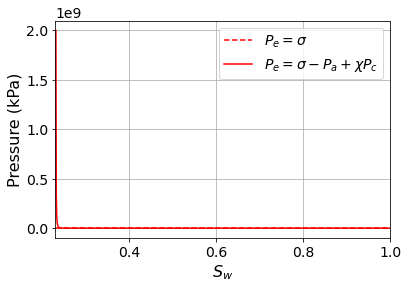

In [31]:
#Plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(Sw, P*1e3, 'r--', label='$P_e=\sigma$')
ax.plot(Sw, Peff*1e3, 'r', label='$P_e=\sigma - P_a + \chi P_c$')
#Plot param
ax.set(ylabel='Pressure (kPa)', 
       xlabel='$S_w$', xlim=[Swr,1.])
ax.grid()
ax.legend()
plt.show()

Calculate the drained moduli using Hertz-Mindlin theory (without taking the capillary effects into account i.e. considering the effective pressure to be equal to the overburden stress and with taking the capillary effects into account).

In [22]:
# Drained properties
Kdr, Gdr = HertzMindlin(Ks, Gs, P, phi=phi, C=C, FC=FC)        #without capillary effects
Kdr_c, Gdr_c = HertzMindlin(Ks, Gs, Peff, phi=phi, C=C, FC=FC) #with capillary effects

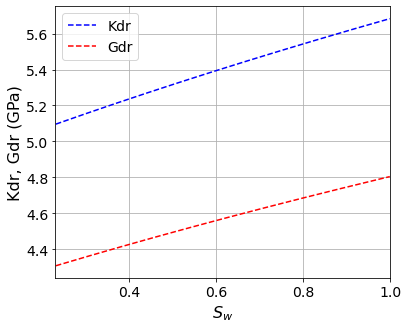

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(Sw, Kdr*1e3, 'b--', label='Kdr')
ax.plot(Sw, Gdr*1e3, 'r--', label='Gdr')
#Plot param
ax.set(ylabel='Kdr, Gdr (GPa)', 
       xlabel='$S_w$', xlim=[Swr,1.])
ax.grid()
ax.legend()
plt.show()

Calculate the saturated properties using Gassmann equation.

In [24]:
# Saturated properties
# -- without capillary effects
Ksat = isoGassmann(Kdr, Gdr, Ks, Kf, phi)
Vp_sat = Vp_from_K_G(Ksat, Gdr, rho_sat)
Vs_sat = Vs_from_G(Gdr, rho_sat)
# -- with capillary effects
Ksat_c = isoGassmann(Kdr_c, Gdr_c, Ks, Kf, phi)
Vp_sat_c = Vp_from_K_G(Ksat_c, Gdr_c, rho_sat)
Vs_sat_c = Vs_from_G(Gdr_c, rho_sat)

Plot predictions against data from Dong and Lu (2016) and predictions from Solazzi et al. (2021):
- *red lines:* current computations;
- *blue lines:* predictions from Solazzi et al. (2021).

> **Note:** differences between current predictions and Solazzi et al. (2021). Need to find out why. May be due to shear modulus value? Using G_Qz = 40 GPa yields a reasonable match between Solazzi et al. (2016) predictions and current predictions. 

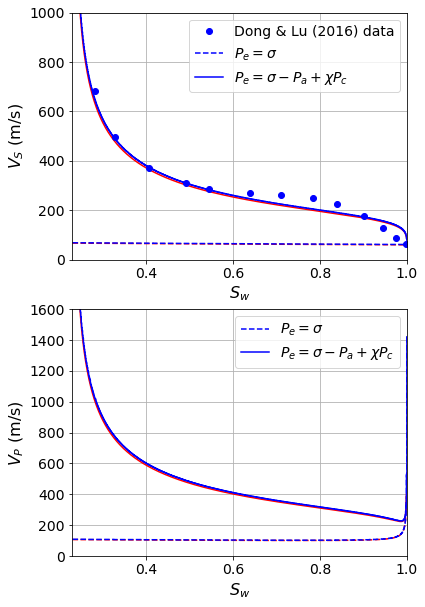

In [25]:
#Data to plot
if i_litho==0: #Esperance Sand data (measured val + fit Solazzi)
    ylimVs = [60,140]
    ylimVp = [125,400]
    Sw_meas = esp_sand_df.Sw.values
    Vs_meas = esp_sand_df['Vs (m/s)'].values
    Sw_fit = esp_sand_fit_df.Sw.values
    Vs_fit_a = esp_sand_fit_df['Vs_a (m/s)'].values
    Vs_fit_b = esp_sand_fit_df['Vs_b (m/s)'].values
    Vp_fit_a = esp_sand_fit_df['Vp_a (m/s)'].values
    Vp_fit_b = esp_sand_fit_df['Vp_b (m/s)'].values
else: #Missouri Clay data (measured val + fit Solazzi)
    ylimVs = [0,1000]
    ylimVp = [0,1600]    
    Sw_meas = mis_clay_df.Sw.values
    Vs_meas = mis_clay_df['Vs (m/s)'].values
    Sw_fit = mis_clay_fit_df.Sw.values
    Vs_fit_a = mis_clay_fit_df['Vs_a (m/s)'].values
    Vs_fit_b = mis_clay_fit_df['Vs_b (m/s)'].values
    Vp_fit_a = mis_clay_fit_df['Vp_a (m/s)'].values
    Vp_fit_b = mis_clay_fit_df['Vp_b (m/s)'].values
#Plot
fig, axs = plt.subplots(2,1, figsize=(6,10))
axs[0].plot(Sw, Vs_sat*1e3, 'r--')
axs[0].plot(Sw, Vs_sat_c*1e3, 'r')
axs[0].plot(Sw_meas, Vs_meas, 'bo', label='Dong & Lu (2016) data')
axs[0].plot(Sw_fit, Vs_fit_b, 'b--', label='$P_e=\sigma$')
axs[0].plot(Sw_fit, Vs_fit_a, 'b', label='$P_e=\sigma - P_a + \chi P_c$')
axs[1].plot(Sw, Vp_sat*1e3, 'r--')
axs[1].plot(Sw, Vp_sat_c*1e3, 'r')
axs[1].plot(Sw_fit, Vp_fit_b, 'b--', label='$P_e=\sigma$')
axs[1].plot(Sw_fit, Vp_fit_a, 'b', label='$P_e=\sigma - P_a + \chi P_c$')
#Plot param
axs[0].set(ylabel='$V_S$ (m/s)', ylim=ylimVs, 
           xlabel='$S_w$', xlim=[Swr,1.])
axs[1].set(ylabel='$V_P$ (m/s)', ylim=ylimVp,
           xlabel='$S_w$', xlim=[Swr,1.])
for i in range(0,2):
    axs[i].grid()
    axs[i].legend()
plt.show()

In [26]:
np.max(Sw)

0.9990000000000007

In [27]:
np.max(Vp_sat_c)

5.546260002393481

In [28]:
np.max(Vp_sat)

0.3872529949147773